# FlipItNews

## About Company 📰:
The Gurugram-based company **FlipItNews** aims to revolutionize the way Indians perceive finance, business, and capital market investment by leveraging artificial intelligence (AI) and machine learning (ML). Their mission is to reinvent financial literacy for Indians, driving financial awareness through smart information discovery and peer engagement. By utilizing smart content discovery and contextual engagement, the company simplifies business, finance, and investment topics for millennials and first-time investors.


## Business Problem 💡
The primary objective is to develop an automated system for categorizing news articles sourced from the company’s internal database into predefined categories, including politics, technology, sports, business, and entertainment. Leveraging natural language processing (NLP) techniques, the project will implement and evaluate at least three different machine learning models to determine the most effective approach for accurate news article classification.

- - - -
## Importing Required Libraries 🤝

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganelnu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ganelnu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- - - -
## Read Dataset 🔍

In [6]:
data = pd.read_csv('../data/flipitnews-data.csv')
data.sample(3)

,Category,Article
1498,Sports,man city 0-2 man utd manchester united reduced...
862,Politics,leaders meet over turkish eu bid tony blair ha...
134,Business,dollar hovers around record lows the us dollar...


In [7]:
print(f"Number of rows in the data: {data.shape[0]}")
print(f"Shape of the dataset: {data.shape}")
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of rows in the data: 2225
Shape of the dataset: (2225, 2)
Number of duplicate rows: 99


In [8]:
data = data.drop_duplicates()
print(f"Number of rows in the data: {data.shape[0]}")
print(f"Shape of the dataset: {data.shape}")
print(f"Number of duplicate rows: {data.duplicated().sum()}")
print(f"Number of unique category: {data['Category'].nunique()}")

Number of rows in the data: 2126
Shape of the dataset: (2126, 2)
Number of duplicate rows: 0
Number of unique category: 5


In [9]:
# Check for missing values
print(f"Number of missing values in each column:\n{data.isnull().sum()}")

Number of missing values in each column:
Category    0
Article     0
dtype: int64


### Observations 🧐

#### Shape and Structure:
* The dataset consists of 2,126 unique rows and 2 columns.
* Original dataset contains 99 duplicated records.
* Five unique category are present.

## Analysis 🧫

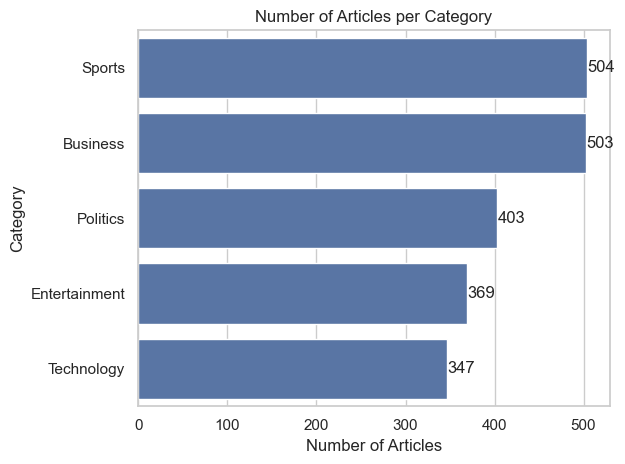

In [10]:
# Histogram of the number of articles per category
sns.set(style="whitegrid")
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)
plt.title('Number of Articles per Category')

for category, count in data['Category'].value_counts().items():
    plt.text(count + 0.5, category, str(count), va='center')
plt.tight_layout()

plt.xlabel('Number of Articles')
plt.ylabel('Category')
plt.show()

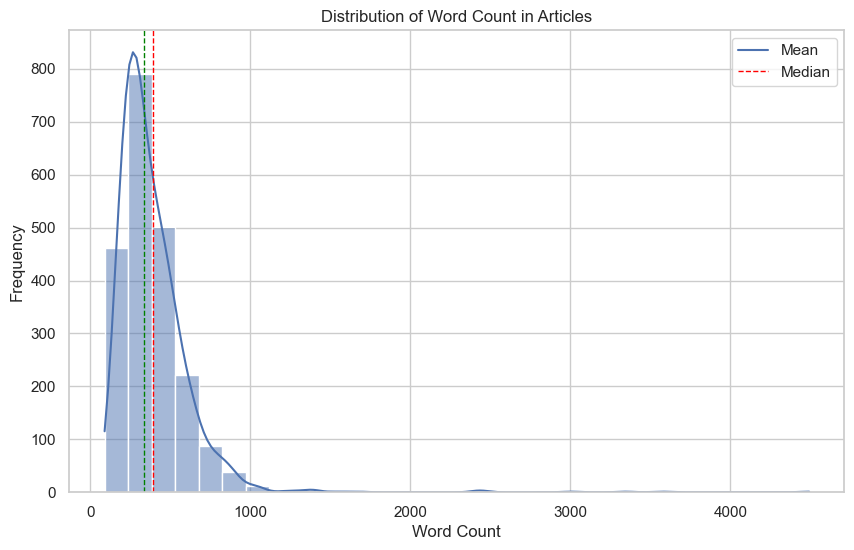

In [11]:
# Hisplotgram of number of words in each article
plt.figure(figsize=(10, 6))
data['Word Count'] = data['Article'].apply(lambda x: len(str(x).split()))
sns.histplot(data['Word Count'], bins=30, kde=True)
plt.title('Distribution of Word Count in Articles')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.axvline(data['Word Count'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data['Word Count'].median(), color='green', linestyle='dashed', linewidth=1)
plt.legend({'Mean': data['Word Count'].mean(), 'Median': data['Word Count'].median()})

## Data Preprocessing ⚙️

In [12]:
def preprocess_text(text):

    # Remove non-letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'Article' column
data['Processed Article'] = data['Article'].apply(preprocess_text)

In [13]:
data.sample(3)

,Category,Article,Word Count,Processed Article
988,Sports,barcelona title hopes hit by loss barcelona s ...,190,barcelona title hope hit loss barcelona pursui...
1751,Entertainment,foxx and swank win us awards jamie foxx and hi...,341,foxx swank win u award jamie foxx hilary swank...
1397,Politics,parties warned over grey vote political part...,415,party warned grey vote political party afford ...


In [14]:
display(data['Article'][1])
display(data['Processed Article'][1])

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing bn bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers transformed

In [15]:
# Encode the target variable (`category`) using Label/Ordinal encoder.

label_encoder = LabelEncoder()
data['Category Encoded'] = label_encoder.fit_transform(data['Category'])
print(f"Encoded categories: {data['Category Encoded'].unique()}")

Encoded categories: [4 0 3 1 2]


In [16]:
def tfidf_vectorize_articles(articles):
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(articles)
    return X, vectorizer

def bow_vectorize_articles(articles):
    vectorizer = CountVectorizer(max_features=5000)
    X_bow = vectorizer.fit_transform(articles)
    return X_bow, vectorizer

def vectorize_articles(articles, method='tfidf'):
    if method == 'tfidf':
        return tfidf_vectorize_articles(articles)
    elif method == 'bow':
        return bow_vectorize_articles(articles)
    else:
        raise ValueError("Method must be either 'tfidf' or 'bow'.")

In [17]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    print(f"Training Accuracy: {model.score(X_train, y_train):.4f}")
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Category')
    plt.ylabel('True Category')
    plt.show()
    
    return {
        "Model": model.__class__.__name__,
        "Train Accuracy": model.score(X_train, y_train),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "ROC AUC Score": roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    }

## TF-IDF Based Features ⛏️

In [18]:
# Vectorize the processed articles
X, vectorizer = vectorize_articles(data['Processed Article'], method='tfidf')
# Display the shape of the resulting TF-IDF matrix
print(f"Shape of the TF-IDF matrix: {X.shape}")
# Display the first few feature names
print(f"First few feature names: {vectorizer.get_feature_names_out()[:10]}")

Shape of the TF-IDF matrix: (2126, 5000)
First few feature names: ['aaa' 'abandoned' 'abc' 'ability' 'able' 'abn' 'abortion' 'abroad'
 'absence' 'absolute']


In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, data['Category Encoded'], test_size=0.2, random_state=42, stratify=data['Category Encoded'])
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (1700, 5000), Test set shape: (426, 5000)


In [20]:
metrics_df = pd.DataFrame()

### Naive Bayes

Training Accuracy: 0.9894
Accuracy: 0.9718
Precision: 0.9728
Recall: 0.9718
F1 Score: 0.9718
ROC AUC Score: 0.9993
               precision    recall  f1-score   support

     Business       0.93      0.99      0.96       101
Entertainment       0.99      0.95      0.97        74
     Politics       0.96      0.98      0.97        81
       Sports       0.99      1.00      1.00       101
   Technology       1.00      0.93      0.96        69

     accuracy                           0.97       426
    macro avg       0.97      0.97      0.97       426
 weighted avg       0.97      0.97      0.97       426

Confusion Matrix:
[[100   1   0   0   0]
 [  2  70   2   0   0]
 [  2   0  79   0   0]
 [  0   0   0 101   0]
 [  3   0   1   1  64]]


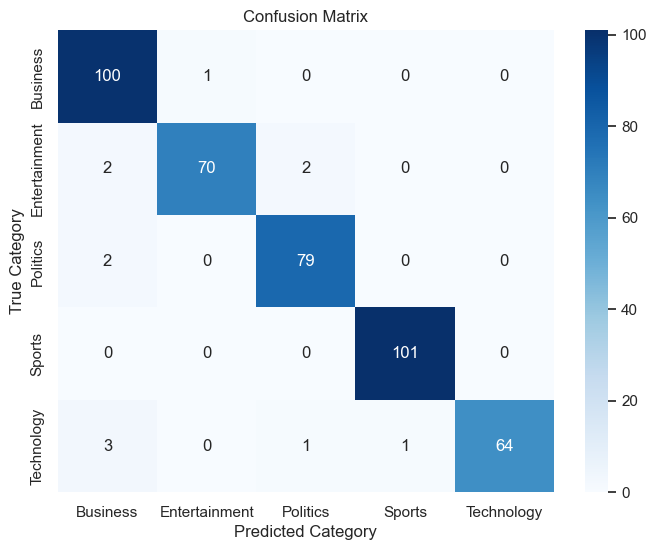

In [21]:
# Train a simple classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Evaluate the model
metrics = evaluate_model(classifier, X_train, y_train, X_test, y_test)
metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics])], ignore_index=True)

### Decision Tree

Training Accuracy: 1.0000
Accuracy: 0.8192
Precision: 0.8199
Recall: 0.8192
F1 Score: 0.8178
ROC AUC Score: 0.8810
               precision    recall  f1-score   support

     Business       0.77      0.86      0.81       101
Entertainment       0.80      0.81      0.81        74
     Politics       0.81      0.78      0.79        81
       Sports       0.90      0.92      0.91       101
   Technology       0.81      0.67      0.73        69

     accuracy                           0.82       426
    macro avg       0.82      0.81      0.81       426
 weighted avg       0.82      0.82      0.82       426

Confusion Matrix:
[[87  1  6  3  4]
 [ 5 60  2  2  5]
 [ 8  5 63  3  2]
 [ 1  3  4 93  0]
 [12  6  3  2 46]]


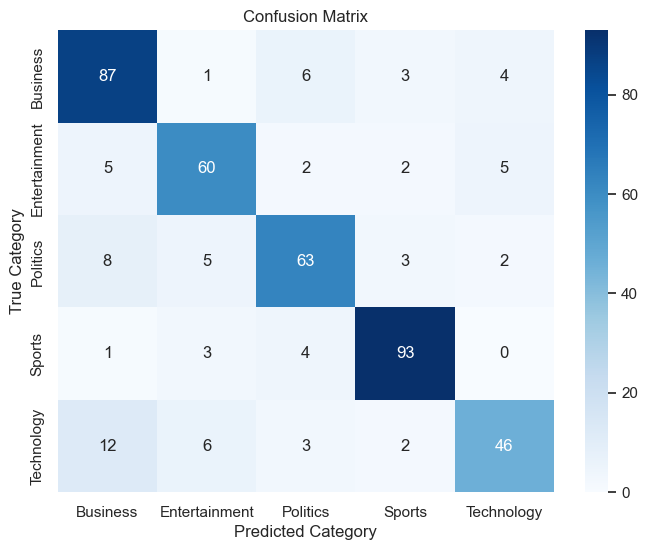

In [22]:
# Train a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate the decision tree classifier
metrics_dt = evaluate_model(dt_classifier, X_train, y_train, X_test, y_test)
metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics_dt])], ignore_index=True)

### Random Forest

Training Accuracy: 1.0000
Accuracy: 0.9695
Precision: 0.9712
Recall: 0.9695
F1 Score: 0.9696
ROC AUC Score: 0.9989
               precision    recall  f1-score   support

     Business       0.91      0.99      0.95       101
Entertainment       0.99      0.96      0.97        74
     Politics       1.00      0.95      0.97        81
       Sports       0.99      1.00      1.00       101
   Technology       0.98      0.93      0.96        69

     accuracy                           0.97       426
    macro avg       0.97      0.97      0.97       426
 weighted avg       0.97      0.97      0.97       426

Confusion Matrix:
[[100   0   0   0   1]
 [  3  71   0   0   0]
 [  4   0  77   0   0]
 [  0   0   0 101   0]
 [  3   1   0   1  64]]


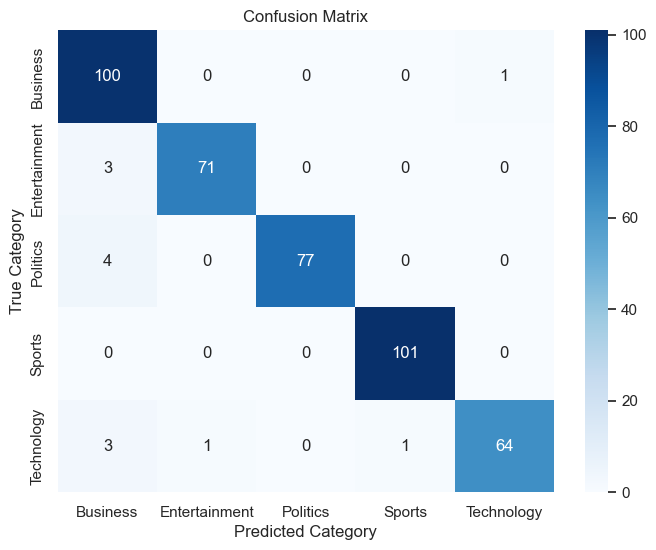

In [23]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the Random Forest classifier
metrics_rf = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)
metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics_rf])], ignore_index=True)

### K-Nearest Neighbors

Training Accuracy: 0.9653
Accuracy: 0.9554
Precision: 0.9557
Recall: 0.9554
F1 Score: 0.9551
ROC AUC Score: 0.9917
               precision    recall  f1-score   support

     Business       0.93      0.96      0.95       101
Entertainment       0.96      0.89      0.92        74
     Politics       0.94      0.99      0.96        81
       Sports       0.98      0.99      0.99       101
   Technology       0.97      0.93      0.95        69

     accuracy                           0.96       426
    macro avg       0.96      0.95      0.95       426
 weighted avg       0.96      0.96      0.96       426

Confusion Matrix:
[[ 97   0   3   0   1]
 [  4  66   1   2   1]
 [  1   0  80   0   0]
 [  0   1   0 100   0]
 [  2   2   1   0  64]]


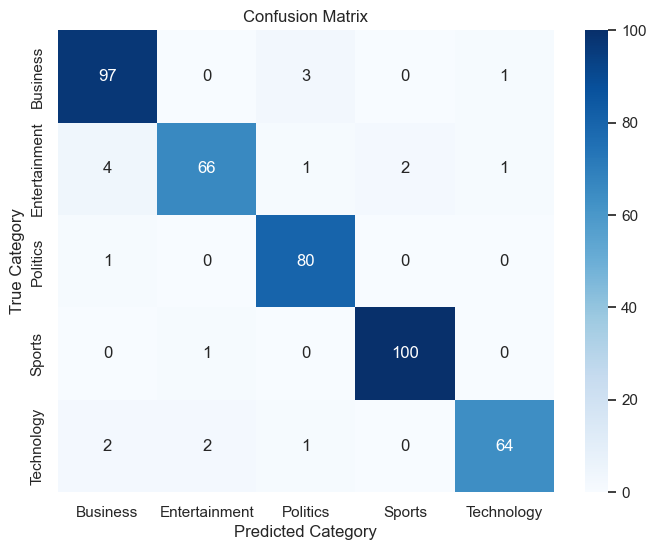

In [24]:
# Train a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Evaluate the k-Nearest Neighbors classifier
metrics_knn = evaluate_model(knn_classifier, X_train, y_train, X_test, y_test)
metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics_knn])], ignore_index=True)


In [25]:
metrics_df['Feature Extraction Method'] = 'TF-IDF'
metrics_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Feature Extraction Method
0,MultinomialNB,0.989412,0.971831,0.972762,0.971831,0.971802,0.999257,TF-IDF
1,DecisionTreeClassifier,1.000000,0.819249,0.819865,0.819249,0.817786,0.880976,TF-IDF
2,RandomForestClassifier,1.000000,0.969484,0.971218,0.969484,0.969647,0.998863,TF-IDF
3,KNeighborsClassifier,0.965294,0.955399,0.955748,0.955399,0.955141,0.991664,TF-IDF


## BOW Based Features ⛏️

In [26]:
# Vectorize the processed articles
X, vectorizer = vectorize_articles(data['Processed Article'], method='bow')
# Display the shape of the resulting BOW matrix
print(f"Shape of the BOW matrix: {X.shape}")
# Display the first few feature names
print(f"First few feature names: {vectorizer.get_feature_names_out()[:10]}")

Shape of the BOW matrix: (2126, 5000)
First few feature names: ['aaa' 'abandoned' 'abc' 'ability' 'able' 'abn' 'abortion' 'abroad'
 'absence' 'absolute']


In [27]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, data['Category Encoded'], test_size=0.2, random_state=42, stratify=data['Category Encoded'])
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (1700, 5000), Test set shape: (426, 5000)


### Naive Bayes

Training Accuracy: 0.9906
Accuracy: 0.9742
Precision: 0.9744
Recall: 0.9742
F1 Score: 0.9742
ROC AUC Score: 0.9983
               precision    recall  f1-score   support

     Business       0.95      0.97      0.96       101
Entertainment       0.97      0.97      0.97        74
     Politics       0.99      0.95      0.97        81
       Sports       1.00      1.00      1.00       101
   Technology       0.96      0.97      0.96        69

     accuracy                           0.97       426
    macro avg       0.97      0.97      0.97       426
 weighted avg       0.97      0.97      0.97       426

Confusion Matrix:
[[ 98   1   0   0   2]
 [  1  72   0   0   1]
 [  3   1  77   0   0]
 [  0   0   0 101   0]
 [  1   0   1   0  67]]


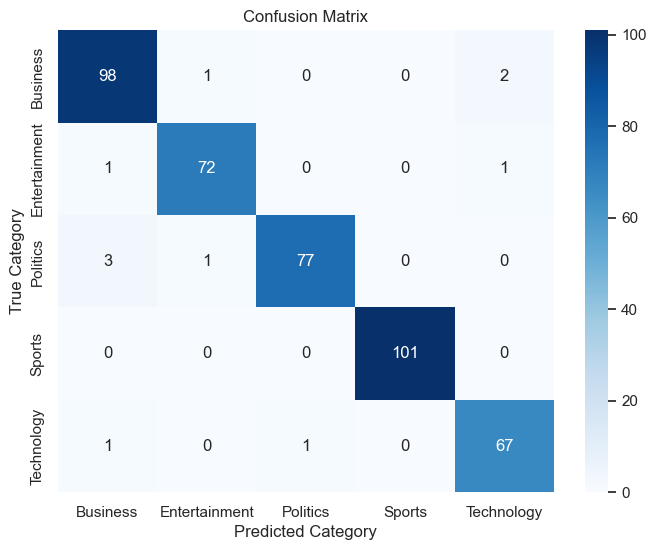

In [28]:
# Train a simple classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Evaluate the model
metrics = evaluate_model(classifier, X_train, y_train, X_test, y_test)
metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics])], ignore_index=True)

### Decision Tree

Training Accuracy: 1.0000
Accuracy: 0.8498
Precision: 0.8534
Recall: 0.8498
F1 Score: 0.8492
ROC AUC Score: 0.9005
               precision    recall  f1-score   support

     Business       0.79      0.93      0.85       101
Entertainment       0.82      0.81      0.82        74
     Politics       0.92      0.80      0.86        81
       Sports       0.92      0.91      0.92       101
   Technology       0.81      0.74      0.77        69

     accuracy                           0.85       426
    macro avg       0.85      0.84      0.84       426
 weighted avg       0.85      0.85      0.85       426

Confusion Matrix:
[[94  1  3  1  2]
 [ 4 60  1  4  5]
 [ 7  4 65  2  3]
 [ 1  5  1 92  2]
 [13  3  1  1 51]]


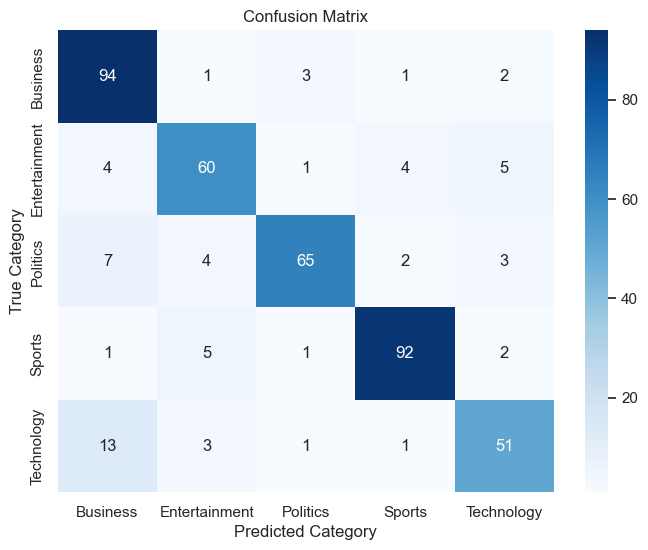

In [29]:
# Train a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate the decision tree classifier
metrics_dt = evaluate_model(dt_classifier, X_train, y_train, X_test, y_test)
metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics_dt])], ignore_index=True)

### Random Forest

Training Accuracy: 1.0000
Accuracy: 0.9624
Precision: 0.9640
Recall: 0.9624
F1 Score: 0.9624
ROC AUC Score: 0.9981
               precision    recall  f1-score   support

     Business       0.91      0.98      0.94       101
Entertainment       0.99      0.97      0.98        74
     Politics       1.00      0.94      0.97        81
       Sports       0.97      1.00      0.99       101
   Technology       0.97      0.90      0.93        69

     accuracy                           0.96       426
    macro avg       0.97      0.96      0.96       426
 weighted avg       0.96      0.96      0.96       426

Confusion Matrix:
[[ 99   0   0   0   2]
 [  2  72   0   0   0]
 [  5   0  76   0   0]
 [  0   0   0 101   0]
 [  3   1   0   3  62]]


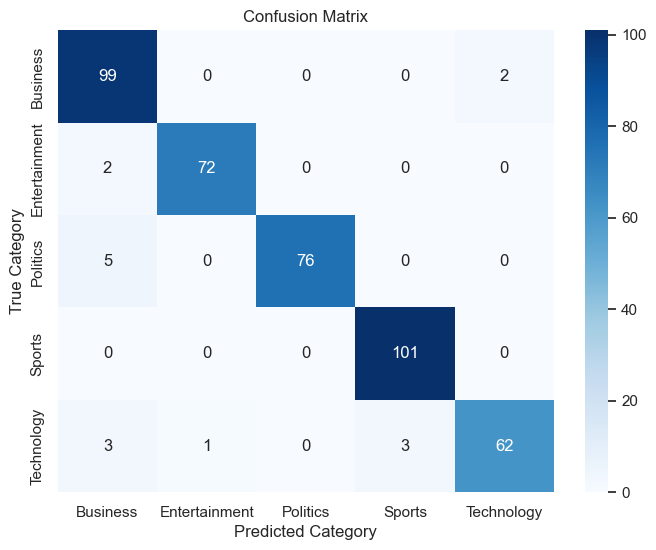

In [30]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the Random Forest classifier
metrics_rf = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)
metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics_rf])], ignore_index=True)

### k-Nearest Neighbors

Training Accuracy: 0.7959
Accuracy: 0.7066
Precision: 0.8040
Recall: 0.7066
F1 Score: 0.7001
ROC AUC Score: 0.9178
               precision    recall  f1-score   support

     Business       0.75      0.82      0.78       101
Entertainment       0.88      0.61      0.72        74
     Politics       0.98      0.57      0.72        81
       Sports       0.53      1.00      0.69       101
   Technology       1.00      0.38      0.55        69

     accuracy                           0.71       426
    macro avg       0.83      0.67      0.69       426
 weighted avg       0.80      0.71      0.70       426

Confusion Matrix:
[[ 83   0   0  18   0]
 [  4  45   0  25   0]
 [ 10   1  46  24   0]
 [  0   0   0 101   0]
 [ 14   5   1  23  26]]


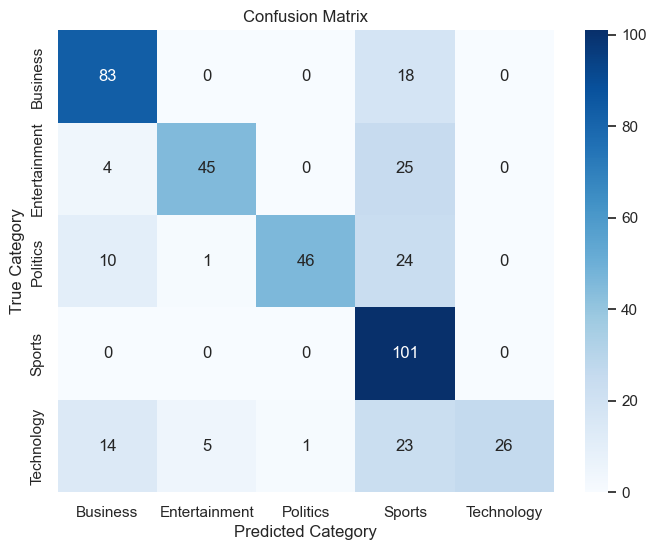

In [31]:
# Train a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Evaluate the k-Nearest Neighbors classifier
metrics_knn = evaluate_model(knn_classifier, X_train, y_train, X_test, y_test)
metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics_knn])], ignore_index=True)


In [32]:
metrics_df['Feature Extraction Method'].fillna('BOW', inplace=True)
metrics_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Feature Extraction Method
0,MultinomialNB,0.989412,0.971831,0.972762,0.971831,0.971802,0.999257,TF-IDF
1,DecisionTreeClassifier,1.000000,0.819249,0.819865,0.819249,0.817786,0.880976,TF-IDF
2,RandomForestClassifier,1.000000,0.969484,0.971218,0.969484,0.969647,0.998863,TF-IDF
3,KNeighborsClassifier,0.965294,0.955399,0.955748,0.955399,0.955141,0.991664,TF-IDF
4,MultinomialNB,0.990588,0.974178,0.974417,0.974178,0.974202,0.998317,BOW
5,DecisionTreeClassifier,1.000000,0.849765,0.853370,0.849765,0.849224,0.900452,BOW
6,RandomForestClassifier,1.000000,0.962441,0.963968,0.962441,0.962421,0.998103,BOW
7,KNeighborsClassifier,0.795882,0.706573,0.803994,0.706573,0.700052,0.917836,BOW


- - - 

## Observations 🔎
* **MultinomialNB** and **RandomForestClassifier** consistently deliver the highest test accuracy, precision, recall, F1, and ROC AUC scores across both TF-IDF and Bag-of-Words (BOW) feature extraction methods.
* **DecisionTreeClassifier** shows perfect training accuracy (1.0) but significantly lower test accuracy, indicating overfitting.
* **KNeighborsClassifier** performs moderately with TF-IDF but poorly with BOW, especially in terms of test accuracy and F1 score.

### Overfitting and Generalization

* **DecisionTreeClassifier** and **RandomForestClassifier** both show perfect training accuracy, but only RandomForest generalizes well to the test set.
* **DecisionTreeClassifier** is highly overfitted, while RandomForest’s ensemble approach mitigates overfitting.

### Best Model Recommendation

* **MultinomialNB** is the most robust and reliable model for this text classification task, showing high and consistent performance across all metrics and feature extraction methods.
* **RandomForestClassifier** is a close second, with nearly identical results.
* **KNeighborsClassifier** may be considered only when using TF-IDF, but is not recommended with BOW.

- - -

# Questionnaire ❔

1. **How many news articles are present in the dataset?**  
     **2126** news articles are present.

2. **Most of the news articles are from _____ category.**  
     Most of the news articles are from the **Sports** category.

3. **Only ___ articles belong to the ‘Technology’ category.**  
     Only **347** articles belong to the ‘Technology’ category.

4. **What are Stop Words and why should they be removed from text data?**  
     Stop words are common words (like "the", "is", "in") that do not carry significant meaning and are usually removed from text data to reduce noise and improve the performance of text analysis.

5. **Explain the difference between Stemming and Lemmatization.**  
     Stemming reduces words to their root form by chopping off suffixes, often resulting in non-words. Lemmatization reduces words to their base or dictionary form (lemma), producing valid words and considering the context.

6. **Which technique—Bag of Words or TF-IDF—is considered more efficient?**  
     **TF-IDF** is generally considered more efficient as it not only counts word occurrences but also weighs them by their importance, reducing the impact of common words.

7. **What’s the shape of train & test datasets after a 75:25 split?**  
     Training set shape: **(1594, 5000)**  
     Test set shape: **(532, 5000)**

8. **Which of the following is found to be the best performing model?**  
     - a. Random Forest  
     - b. Nearest Neighbors  
     - c. Naive Bayes  
     **Naive Bayes** is found to be the best performing model (highest test accuracy and F1 score).

9. **According to this use case, both precision and recall are equally important. (T/F)**  
     **True**

- - - 